<a href="https://colab.research.google.com/github/NancyYiWang/WildFireSmokePrediction/blob/main/DealWithTerrainData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 15.4 MB/s eta 0:00:00


In [4]:
# Check the metadata, shape, band count of the terrain .tiff file, as well as values in it.

import rasterio
import numpy as np

with rasterio.open("/content/drive/My Drive/WildFire/DATA/Terrain/terrain_broad_calgary.tiff") as src:

    band_count = src.count
    print(f"Number of bands in the TIFF file: {band_count}")
    metadata = src.meta
    print(metadata)

    bands_array = np.stack([src.read(band) for band in range(1, band_count + 1)], axis=0)
    transform = src.transform

print(f"Shape of bands_array: {bands_array.shape}")
print(f"Transform: {transform}")
print(bands_array)

Number of bands in the TIFF file: 1
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 960, 'height': 720, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(0.004166666666666667, 0.0, -116.0,
       0.0, -0.004166666666666667, 52.5)}
Shape of bands_array: (1, 720, 960)
Transform: | 0.00, 0.00,-116.00|
| 0.00,-0.00, 52.50|
| 0.00, 0.00, 1.00|
[[[1296.9934  1288.6334  1281.4034  ...  721.3199   720.48987  718.78986]
  [1331.3934  1329.4635  1314.5034  ...  722.6599   721.9399   719.6599 ]
  [1377.1835  1384.8834  1372.7634  ...  721.47986  721.3799   722.3999 ]
  ...
  [2208.0374  2105.3074  2056.0674  ...  937.79407  937.6241   936.9541 ]
  [2129.0076  2066.9976  2000.2

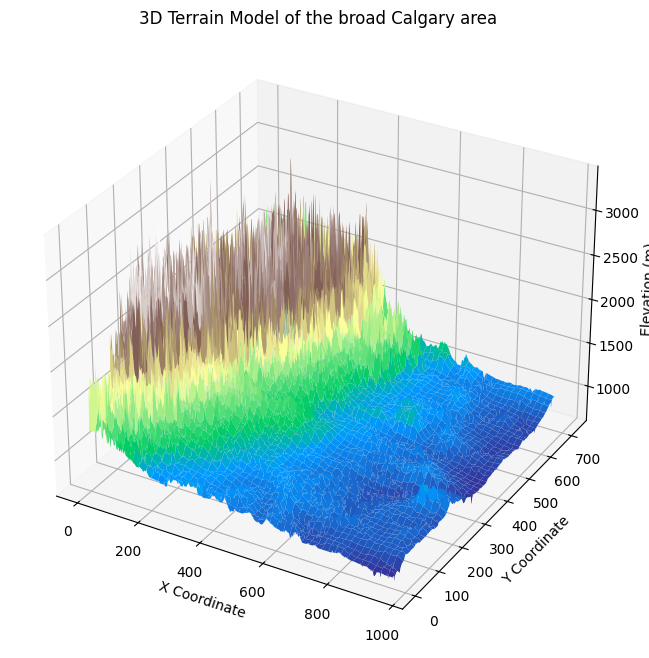

In [5]:
# Plot the elevation

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

elevation = bands_array[0]
nrows, ncols = elevation.shape
x = np.linspace(0, ncols, ncols)
y = np.linspace(0, nrows, nrows)
x, y = np.meshgrid(x, y)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, elevation, cmap='terrain', edgecolor='none')

ax.set_title("3D Terrain Model of the broad Calgary area")
ax.set_xlabel("X Coordinate")
ax.set_ylabel("Y Coordinate")
ax.set_zlabel("Elevation (m)")
plt.show()